# Session 2

## Image processing: Convolution, Cross Correlation and Fitlers

We have discussed several image manipulation related to pixel values and positions such as illumination manipulation, gray scaling.

<img src="./images/grayscaling.png"/>

Now, let's look at the image as a signal (function) that has x, y coordinates and pixel intensity value. We need to know the effect of a certain system over the image signal. For example, if we have a system that receives the image signal as an input and output another signal(variant of an image e.g. smoothed). How can we find what the system does? Does it adds some scalar to the signal? Does it multiply or divide it with another signal?
<img src="./images/sys.png"/>

Typically, if this systems perserves two key properties (Linearity and shift invariance), we can defines its operation using a process called ***Convlution***.

    Linearity means that if the input is a linear combination of two signals, then the output is a linear combination of the output of the two input signals. 
    e.g: g1 is the system output of f1 and g2 is the system output of f2, then the system output of f1+f2 should be g1+g2 to call this a linear system
    Shift invariance means that if the input has shifted with "a", then the output shoud be shifted with the same amount.
    e.g: g1 is the system output of f1. If the input has become "f1 - a" (formally f1(x-a)), then the output should be "g1 - a" (formally g1(x-a)) to call this a shift invariant system

So, what is convlution?
Convlution is a mathematical operation that expresses how the shape of a signal is modified by another signal (which is the signal expressing the behavior of the system).

It's formally defined as:

<img src="./images/disc_conv_eqn.gif"/>

as we can see:
- we take a signal, inverse it and shift it
- we start sliding it infinitesimally from -inf and calculate the multiplication between the two signals
- then sum all those multiplications from -inf to +inf

If we are intented to calculate the convlution between this signal <img src="./images/rect.png"/> and this signal <img src="./images/rect.png"/> This operation can be visualized using the following gif.


<img src="./images/convgif.gif"/>
<br/>
<br/>

> Inside the convlution process, the multiplication part implies the correlation between the two signals at this very step.

Now, suppose we have an image function f[i, j], and a system with behaviour h[i, j], and we are interested in finding the output g[i,j]
<img src="./images/conv_img.png" />

we first need to flip `h`, Note that the flip here is done in two dimensions, first, <img src="./images/h.png" />, then, <img src="./images/h2.png" />
and apply it with on the image, <img src="./images/apply.png" /> then multiply and calculate the summation, <img src="./images/multiply.png" /> and this is the output value at the same poistion of the pixel in the input image.


To have the whole output, we need to scan the whole input image signal, this is when we can encounter the border problem:

<img src="./images/border.png" />

To overcome it, we can use ***padding***, either with zeros, ignore, border repetetion, relfection, etc.

Let's try playing around with systems with different `h` functions, that we call them filters or kernels.

In [28]:
import cv2
import numpy as np

In [29]:
image = cv2.imread('./images/elephant.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
kernel_7x7 = np.zeros((7, 7), np.float32)
kernel_7x7[3, 3] = 1
print(kernel_7x7)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [31]:
# We use the cv2.fitler2D to conovlve the kernal with an image 
img2 = cv2.filter2D(image, -1, kernel_7x7) # -1 to maintain the same input depth ("precision" of each pixel)
cv2.imshow('unit Kernel', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
kernel_7x7 = np.zeros((70, 70), np.float32)
kernel_7x7[int(kernel_7x7.shape[0]/2), 0] = 1
print(kernel_7x7)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
img2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('unit Kernel', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
kernel_7x7 = np.ones((7, 7), np.float32)
print(kernel_7x7)

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


In [35]:
img2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('Kernel', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
kernel_7x7 = np.ones((7, 7), np.float32) / 49

img2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('Kernel', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
kernel = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

print(kernel)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


In [38]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
kernel = np.array([[-1,0,1], 
                              [-2,0,2], 
                              [-1,0,1]])

print(kernel)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [40]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
image = cv2.imread("./images/shapes.jpg", -1)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
kernel = - kernel

print(kernel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [44]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
kernel = kernel.T
print(kernel)

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [46]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
kernel = - kernel
print(kernel)

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


In [48]:
img2 = cv2.filter2D(image, -1, kernel)
cv2.imshow('Image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Now, as we experiemented kernels, let's revisit the multiplication part in convlution process and compare it to correlation.

Suppose that our kernel now is similar to part of the image, and we want to find the matching part. what we can think of is to measure the difference between that small part (template) and each part of the image - sliding it over the whole image - and take the part with min difference.

<img src="./images/temp.png" width= "400"/>

This can be formalized by: 

<img src="./images/corr.png" width= "500">

Which is the same as the convlution with no flip (not meaningful to flip what we actually need to match)

<img src="./images/corr2.png" width= "500">

In [49]:
image = cv2.imread('images/card.jpg')
image = cv2.resize(image, (700, 700))
cv2.imshow('card', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
template = cv2.imread('images/tempcard.png',0)
cv2.imshow('temp', template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

cv2.imshow('matching', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [52]:
image = cv2.imread('./images/WaldoBeach.jpg')
cv2.imshow('Where is Waldo?', image)
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread('images/waldo.jpg',0)
cv2.imshow('Waldo', template)
cv2.waitKey(0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

cv2.imshow('Where is Waldo?', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## CNN
* **1. Introduction convolutional neural networks(CNNs)**
    * 1.1 Arquitecture of the visual cortex
    * 1.2 Convolutional layers
    * 1.3 Pooling layer
    * 1.4 CNN architecture
     
    
* **2. Example**
    * 2.1 Load data
    * 2.2 Data preparation
    * 2.3 Building CNN architecture using keras sequential API
    * 2.4 Train the model
    * 2.5 Model evaluation

### 1 Introduction convolutional neural networks

Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s.

In the last few years, thanks to the increase in computational power, the amount of available training data, and the study of deep nets, CNNs have achieved superhuman performance on some complex visual tasks like image search services, self-driving cars, and more.


A researcher performed experiments on cats in 1959, giving insights on the structure of the visual cortex. He noticed that many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field(see Figure).


The authors showed that some neurons react only to images of horizontal lines, while others react only to lines with different orientations (two neurons may have the same receptive field but react to different line orientations). They also noticed that some neurons have larger receptive fields, and they react to more complex patterns that are combinations of the lower-level patterns. These observations led to the idea that the higher-level neurons are based on the outputs of neighboring lower-level neurons (notice that each neuron is connected only to a few neurons from the previous layer). This powerful architecture is able to detect all sorts of complex patterns in any area of the visual field.

![](https://i.ibb.co/jvphv3k/Captura.png)


Observation: We do not use a regular deep neural network with fully connected layers for image recognition. Despite it works fine for small images, it breaks for larger images because of the huge number of parameters it requires.


### 1.2 Convolutional layers

The most important building block of a CNN is the *convolutional layer*: neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields (see Figure 14-2). In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

![](https://i.ibb.co/QPBKL3M/Captura2.png)

A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h - 1$, columns $j$ to $j + f_w - 1$, where $f_h$ and $f_w$ are the height and width of the receptive field (see Figure 14-3). In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called *Zero padding*.

![](https://i.ibb.co/WyhzNYG/Captura3.png)


It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields, as shown in Figure 14-4.

![](https://i.ibb.co/ZLWjXPD/Captura4.png)

The shift from one receptive field to the next is called the *stride*. In the diagram, a $5 \times 7$ input layer (plus zero padding) is connected to a $3\times4$ layer, using $3\times3$ receptive fields and a stride of 2 (in this example the stride is the same in both directions, but it does not have to be so). A neuron located in row $i$, column $j$ in the upper layer is connected to the outputs of the neurons in the previous layer located in rows $i\times s_h$ to $i\times s_h+f_h-1$, columns $j \times s_w$ to $j \times s_w + f_w -1$, where $s_h$ and $s_w$ are the vertical and horizontal strides.



### Filters



A neuron’s weights can be represented as a small image the size of the receptive field. For example, Figure 14-5 shows two possible sets of weights, called filters (or convolution kernels). The first one is represented as a black square with a vertical white line in the middle (it is a $7 \times 7$ matrix full of 0s except for the central column, which is full of 1s); neurons using these weights will ignore everything in their receptive field except for the central vertical line (since all inputs will get multiplied by 0, except for the ones located in the central vertical line). The second filter is a black square with a horizontal white line in the middle. Once again, neurons using these weights will ignore everything in their receptive field except for the central horizontal line.

Now if all neurons in a layer use the same vertical line filter (and the same bias term), and you feed the network the input image shown in Figure 14-5 (bottom image), the layer will output the top-left image. Similarly, the upper-right image is what you get if all neurons use the same horizontal line filter. A layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. Of course you do not have to define the filters manually: instead, during training the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.

**Note**: It is usually choosing odd numbers to define the size of the filters.
![](https://i.ibb.co/HnD2Mth/Captura5.png)

 



Applying a convolution to an image is like running a filter of a certain dimension and sliding it on top of the image. That operation is translated into an element-wise multiplication between the two matrices and finally an addition of the multiplication outputs. The final integer of this computation forms a single element of the output matrix.

Let’s review this via an example, where we want to apply a filter (kernel) to detect vertical edges from a 2D original image.

![texto alternativo](https://i.ibb.co/P6cLRPt/conv.png)

In the above example, I used a value of a stride equal to 1, meaning the filter moves horizontally and vertically by one pixel. The values of the filter were already decided in the convolution. The goal of a convolutional neural network is to learn these numbers. We treat them as parameters, which the network learns using backpropagation.

### Multiple feature maps



Up to now, for simplicity, I have represented the output of each convolutional layer as a thin 2D layer, but in reality a convolutional layer has multiple filters (you decide how many), and it outputs one feature map per filter, so it is more accurately represented in 3D (see Figure 14-6). To do so, it has one neuron per pixel in each feature map, and all neurons within a given feature map share the same parameters (i.e., the same weights and bias term). However, neurons in different feature maps use different parameters.

In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

Observations:
- The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model. Moreover, once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location. In contrast, once a regular DNN has learned to recognize a pattern in one location, it can recognize it only in that particular location.

- Input images are also composed of multiple sublayers, the number of channels: one per color channel. There are typically three: red, green, and blue (RGB).

![](https://i.ibb.co/LQLtqxC/Captura6.png)


Specifically, a neuron located in row $i$, column $j$ of the feature map $k$ in a given convolutional layer $l$ is connected to the outputs of the neurons in the previous layer $l-1$, located in rows $i\times s_h$ to $i\times s_h+f_h-1$ and columns $j \times s_w$ to $j \times s_w + f_w -1$, across all feature maps (in layer $l-1$). Note that all neurons located in the same row $i$ and column $j$ but in different feature maps are connected to the outputs of the exact same
neurons in the previous layer.



We can introduce the formula to quickly calculate the output size. If $l$ is a convolutional layer, we denote the stride by $s_h^{[l]}$, $s_w^{[l]}$; the size of the filter (kernel) by $f_h^{[l]}$, $f_w^{[l]}$; and the padding by $p^{[l]}$. The input of this layer $l$ is going to be some dimension, $n_h^{[l-1]} \times\ n_w^{[l-1]} \times n_c^{[l-1]}$ (this is the output of the previous layer $l-1$, for example, if $l$ is the first hidden layer, the input of layer $l$ will be the images with shape [height of the images $\times$ width of the images $\times$ number of channels]). The output of the layer $l$ will be also a volume with dimension $n_h^{[l]} \times\ n_w^{[l]} \times n_c^{[l]}$ where 
$n_h^{[l]}=\frac{n_h^{[l-1]}+2p^{[l]}-f_h^{[l]}}{s_h^{[l]}}+1$, 
$n_w^{[l]}=\frac{n_w^{[l-1]}+2p^{[l]}-f_w^{[l]}}{s_w^{[l]}}+1$ and 
$n_c^{[l]}$ will be equal to the number of filters used in the convolutional layer. Note that the dimension of each filter in the layer $l$ will be $f_h^{[l]} \times\ f_w^{[l]} \times n_c^{[l-1]}$.



For example, suposse the input images have size $n_h^{[0]} \times\ n_w^{[0]} \times n_c^{[0]}=39 \times\ 39 \times3$ and we apply in the first hidden layer a convolutional layer with stride $s_h^{[1]}=s_w^{[1]}=1$, size filter (kernel) $f_h^{[1]}=f_w^{[1]}=3$, padding $p^{[1]}=0$ and we use $10$ filters, then the output volume of this layer will have the dimension $n_h^{[1]} \times\ n_w^{[1]} \times n_c^{[1]}=
\frac{n_h^{[0]}+2p^{[1]}-f_h^{[1]}}{s_h^{[1]}}+1 \times
\frac{n_w^{[0]}+2p^{[1]}-f_w^{[1]}}{s_w^{[1]}}+1 \times n_c^{[1]}=
\frac{39+0-3}{1}+1 \times
\frac{39+0-3}{1}+1 \times 10 = 37 \times 37 \times 10$, and each of the $10$ filters will have dimension $f_h^{[1]} \times\ f_w^{[1]} \times n_c^{[0]}= 3 \times 3 \times 3$.

Another example is shown in the next figure (only one filter is applied):

![texto alternativo](https://i.ibb.co/VMsq2yb/dim-conv.png)

Another example using 2 filters:

![texto alternativo](https://i.ibb.co/wh7RGgQ/dim-conv2.png)




The final step that takes us to a convolutional neural layer is to add the bias and a non-linear function.

![texto alternativo](https://i.ibb.co/ZhnzLPp/conv-layer.png)

Remember that the parameters involved in one layer are independent of the input size image.

So let’s consider, for example, that we have 10 filters that are of size 3 $\times$ 3 $\times$ 3 in one layer of a neural network. Each filter has 27 (3 $\times$ 3 $\times$ 3) + 1 bias => 28 parameters. Therefore, the total amount of parameters in the layer is 280 (10 $\times$ 28).

We are now ready to build a complete deep convolutional neural network.
The following architecture depicts a simple example of that:

![texto alternativo](https://i.ibb.co/WFDtffF/deep-cnn.png)

**Note**: Reggard to the padding, there are two common choices:
- Valid padding: means no padding.
- SAME padding: the padding is chosen in such way that the output size is the same as the input size.

### Memory



Convolutional layers require a huge amount of RAM. This is especially true during training, because the reverse pass of backpropagation requires all the intermediate values computed during the forward pass.

During inference (i.e., when making a prediction for a new instance) the RAM occupied by one layer can be released as soon as the next layer has been computed, so you only need as much RAM as required by two consecutive layers. But during training everything computed during the forward pass needs to be preserved for the reverse pass, so the amount of RAM needed is (at least) the total amount of RAM required by all layers. 

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you could distribute the CNN across multiple devices.

### 1.3 Pooling layer



The  pooling layers are the second common building block of CNNs. Their goal is to *subsample*  (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).

Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer (within a small rectangular receptive field). You must define its size, the stride, and the padding type, just like before (the formulas to compute the output size of a convolutional layer also work). However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.  Figure 14-8 shows a max pooling layer, which is the most common type of pooling layer.

![](https://i.ibb.co/rFL9w3v/Captura8.png)

In this example, we use a $2\times2$ pooling kernel, with a stride of 2, and no padding. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped. For example, in the lower left receptive field in  Figure 14-8, the input values are 1, 5, 3, 2, so only the max value, 5, is propagated to the next layer. Because of the stride of 2, the output image has half the height and half the width of the input image.

A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.


A max pooling layer also introduces some level of  **invariance**  to small translations, as shown in  Figure 14-9. Here we assume that the bright pixels have a lower value than dark pixels, and we consider 3 images (A, B, C) going through a max pooling layer with a 2 × 2 kernel and stride 2. Images B and C are the same as image A, but shifted by one and two pixels to the right. As you can see, the outputs of the max pooling layer for images A and B are identical. This is what translation invariance means. However, for image C, the output is different: it is shifted by one pixel to the right (but there is still 75% invariance).  Such invariance (even if it is limited) can be useful in cases where the prediction should not depend on these details, such as in classification tasks.


![](https://i.ibb.co/P5vN9vD/Captura9.png)

But max pooling has some downsides: firstly, it is very destructive: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two times smaller in both directions (so its area will be four times smaller), simply dropping 75% of the input values. And in some applications, invariance is not desirable, for example for  semantic segmentation: the task of classifying each pixel in an image depending on the object that pixel belongs to: obviously, if the input image is translated by 1 pixel to the right, the output should also be translated by 1 pixel to the right. The goal in this case is equivariance, not invariance: a small change to the inputs should lead to a corresponding small change in the output.

We can see the application of pooling layers in the following example of a Convolutional Neural Network. This network is inspired by the LeNet-5 network:

![texto alternativo](https://i.ibb.co/D5KkZcm/deep-cnn2.png)

### TensorFlow implementation

Implementing a max pooling layer in TensorFlow is quite easy. The following code creates a max pooling layer using a $2\times2$ kernel. The strides default to the kernel size, so this layer will use a stride of $2$ (both horizontally and vertically). By default, it uses VALID padding (i.e., no padding at all):

In [53]:
from keras.layers import MaxPool2D
max_pool = MaxPool2D(pool_size=2)

To create an average pooling layer, just use `AvgPool2D` instead of `MaxPool2D`. As you might expect, it works exactly like a max pooling layer, except it computes the mean rather than the max. Average pooling layers used to be very popular, but people mostly use max pooling layers now, as they generally perform better. This may seem surprising, since computing the mean generally loses less information than computing the max. But on the other hand, max pooling preserves only the strongest feature, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work
with. Moreover, max pooling offers stronger translation invariance than average pooling.


Note that max pooling and average pooling can be performed along the depth dimension rather than the spatial dimensions (height and width), although this is not as common. This can allow the CNN to learn to be invariant to various features. For example, it could learn multiple filters, each detecting a different rotation of the same pattern, such as handwritten digits (see Figure 14-10), and the depth-wise max pooling layer would ensure that the output is the same regardless of the rotation. The CNN could similarly learn to be invariant to anything else: thickness, brightness, skew, color, and so on.

![texto alternativo](https://i.ibb.co/zZkmsHy/deph-wise-max-pool.png)

One last type of pooling layer that you will often see in modern architectures is the *global average pooling* layer. It works very differently: all it does is compute the mean of each entire feature map (it’s like an average pooling layer using a pooling kernel with the same spatial dimensions as the inputs). This means that it just outputs a single number per feature map and per instance. Although this is of course extremely
destructive (most of the information in the feature map is lost), it can be useful as the output layer, as we will see later in this chapter. To create such a layer, simply use the `keras.layers.GlobalAvgPool2D` class:

In [54]:
from keras.layers import GlobalAvgPool2D
global_avg_pool = GlobalAvgPool2D()

### 1.4 CNN architecture





Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer), then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps) thanks to the convolutional layers (see  Figure 14-11). At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities).

![](https://i.ibb.co/4P0Vy7n/Captura10.png)

It’s common that, as we go deeper into the network, the sizes ($n_h, n_w$) decrease, while the number of channels ($n_c$) increases.

### 2 Example

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from tensorflow.keras.datasets import cifar10
'''
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane\n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


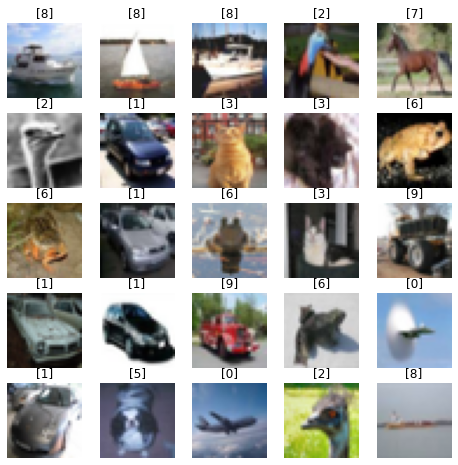

In [4]:
fig, axes1 = plt.subplots(5,5,figsize=(8,8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i,:])
        axes1[j][k].set_title(y_train[i])

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train.shape

(50000, 10)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[32, 32, 3]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [11]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               819456    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [12]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 20,validation_split= 0.1)

Epoch 1/20
450/450 [==============================] - 11s 6ms/step - loss: 1.6545 - accuracy: 0.4146 - val_loss: 1.3435 - val_accuracy: 0.5312
Epoch 2/20
450/450 [==============================] - 2s 5ms/step - loss: 1.3647 - accuracy: 0.5251 - val_loss: 1.2089 - val_accuracy: 0.5852
Epoch 3/20
450/450 [==============================] - 2s 5ms/step - loss: 1.2393 - accuracy: 0.5700 - val_loss: 1.1086 - val_accuracy: 0.6176
Epoch 4/20
450/450 [==============================] - 2s 5ms/step - loss: 1.1641 - accuracy: 0.6004 - val_loss: 1.0976 - val_accuracy: 0.6302
Epoch 5/20
450/450 [==============================] - 2s 5ms/step - loss: 1.1027 - accuracy: 0.6219 - val_loss: 1.0932 - val_accuracy: 0.6344
Epoch 6/20
450/450 [==============================] - 2s 5ms/step - loss: 1.0648 - accuracy: 0.6340 - val_loss: 1.0394 - val_accuracy: 0.6574
Epoch 7/20
450/450 [==============================] - 2s 5ms/step - loss: 1.0176 - accuracy: 0.6504 - val_loss: 1.0410 - val_accuracy: 0.6424
Epoch

## Task

This model overfits the data, how can we improve its performance?

## Sources

- Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurélien Géron (O’Reilly). Copyright 2019 Aurélien Géron, 978-1-492-03264-9
- http://introtodeeplearning.com/
- https://course.fast.ai/
- https://pyimagesearch.com/
- https://sisu.ut.ee/imageprocessing/book/6
- https://www.simplilearn.com/image-processing-article
- https://pythonprogramming.net/color-filter-python-opencv-tutorial/
- https://www.analyticsvidhya.com/blog/2021/05/image-processing-using-opencv-with-practical-examples/#h2_11
- https://www.youtube.com/watch?v=1_hwFc8PXVE&list=PL2zRqk16wsdorCSZ5GWZQr1EMWXs2TDeu&index=7